##Adatok beolvasása

In [ ]:
!wget -O titanic_cleaned.csv https://www.dropbox.com/s/0x6e1gkmkektn7j/titanic_cleaned.csv?dl=0

--2020-11-03 11:40:43--  https://www.dropbox.com/s/0x6e1gkmkektn7j/titanic_cleaned.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0x6e1gkmkektn7j/titanic_cleaned.csv [following]
--2020-11-03 11:40:44--  https://www.dropbox.com/s/raw/0x6e1gkmkektn7j/titanic_cleaned.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdbf900660979b5eade63e61113.dl.dropboxusercontent.com/cd/0/inline/BCd0iv7fc4xf0R8FQkhBEU5hmiMwMrIo2WMvsvDtt3ZEXOeoWgGTTlBamaZDWvcL1M_YdKAwZN_8-Weevj373pokWNaNH4H170ECa1GMsz2xawTh1_WHKRihy_3883kWY1c/file# [following]
--2020-11-03 11:40:44--  https://ucdbf900660979b5eade63e61113.dl.dropboxusercontent.com/cd/0/inline/BCd0iv7fc4xf0R8FQkhBEU5hmiMwMrIo2WMvsvDtt3ZEXOeoWgGTTlBamaZDWvcL1M_YdKAwZN_8-Weevj373pok

## Itt az előző két alkalommal tisztított adatot olvassuk be. Már a hiányzó értékek pótólva vagy törölve vannak, illetve a szöveges változók mappelve.

In [ ]:
import pandas as pd

df_titanic = pd.read_csv('titanic_cleaned.csv')

In [ ]:
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,30.0,1,0,7.2500,0,0
1,1,1,0,35.0,1,0,71.2833,1,2
2,1,3,0,21.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,2
4,0,3,1,30.0,0,0,8.0500,0,0


## Ezután eldobjuk a cimkét (Survived oszlopot), hiszen nem ellenörzőtt tanulást szeretnénk csinálni, azt akarjuk, hogy az algoritmus magától csoportosítson az adat struktúrája alapján.

In [ ]:
X = df_titanic.drop('Survived', axis = 1)

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,30.0,1,0,7.2500,0,0
1,1,0,35.0,1,0,71.2833,1,2
2,3,0,21.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,2
4,3,1,30.0,0,0,8.0500,0,0


## Ugyanúgy normalizáljuk az adatot, mint eddig.

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)

X_normalized = scaler.transform(X)

In [ ]:
print(X_normalized)

[[ 0.82737724  0.73769513  0.39955853 ... -0.50244517 -0.56883712
  -0.73363597]
 [-1.56610693 -1.35557354  1.14621678 ...  0.78684529  1.00518113
   1.35143469]
 [ 0.82737724 -1.35557354 -0.94442632 ... -0.48885426 -0.56883712
   0.30889936]
 ...
 [ 0.82737724 -1.35557354 -0.94442632 ... -0.17626324 -0.56883712
   0.30889936]
 [-1.56610693  0.73769513  0.39955853 ... -0.04438104  1.00518113
  -0.73363597]
 [ 0.82737724  0.73769513  0.39955853 ... -0.49237783  2.57919938
  -0.73363597]]


## Ezután jön a KMeans algoritmus.
### Ennek egy fontos paramétere van, hogy hány csoportot (clustert) keressen, jelen esetben 2-t, hiszen feltételezzük, hogy két csoportunk van.

In [ ]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters = 2, random_state = 42)
clf.fit(X_normalized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

## Dimenzió csökkentése

### Dimenzió csökkentését eszközölünk. A cél, hogy a folyamat közben a legkevesebb információt veszítsük, ehhez főkomponens analízist (PCA-t) használunk.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(X_normalized)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### A PCA n_components paramétere mondja meg, hogy hány főkomponens legyen, vagyis hány dimenzióra csökkentsük az adatot, jelen esetben 2. Ezután az explaned_variance_ratio_-ban lesz benne, hogy ez a 2 dimenzió az összesből mennyi információt tartalmaz.

In [ ]:
print(pca.explained_variance_ratio_)

[0.29427603 0.1832803 ]


## Ezután vizualizáltuk az adatokat.

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
y = df_titanic["Survived"]

pca = PCA()
components = pca.fit_transform(X_normalized)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(3),
    color=y
)
fig.update_traces(diagonal_visible=False)
fig.show()

## 3 dimenziós scatter plot

In [ ]:
pca = PCA(n_components=3)
components = pca.fit_transform(X_normalized)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(components, x =0, y=1, z=2, color = y)
fig.show()

# KMeans a PCA-val redukált dimenziójú adaton

In [ ]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_normalized)
clf = KMeans(n_clusters=2, random_state=42)
clf.fit(components)
kmeans_X = clf.predict(components)

## Klaszterek 2 dimenzióban ábrázolása

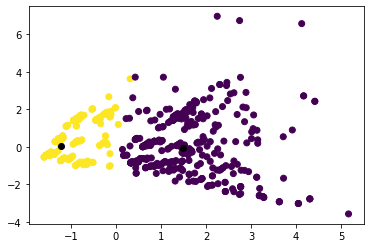

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(components[:,0], components[:,1], c = kmeans_X)

centers = clf.cluster_centers_

plt.scatter(centers[:,0], centers[:,1], c = 'black')